#Introducation to Data Analysis and Visualization with Python
###Mike Trenfield
###m.trenfield@gmail.com
###DFW Pythoneers Monthly Meetup
###April 11, 2015

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline

#The Pandas Library

The [Pandas](http://pandas.pydata.org/) library was written by [Wes McKinney](http://blog.wesmckinney.com/) to make financial data analysis easier.  He ended up making other kinds of data analysis much easier, too.  The central object of the library is the DataFrame, which is very much like R's object of the same name.  There is an excellent [book](http://shop.oreilly.com/product/0636920023784.do) that can teach you most of what you need to know about it.  If you're still on the fence after this tutorial, check out some of the examples in this [gallery of interesting IPython notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks).

The heavy numerical computations in pandas are handled by [numpy](http://www.numpy.org/), which I do not plan on covering today.  If you don't want pandas to be very slow, you'll want to take advantage of this and vectorize as much as possible by applying functions to entire arrays rather than location by location.

We will be exploring Pandas (as well as a few plotting and statistical libraries) by looking at data from a [study on socioeconomic mobility in 741 American commuting zones](http://obs.rc.fas.harvard.edu/chetty/mobility_geo.pdf) that I retrieved from [a homework assignment in this course](http://www.stat.cmu.edu/~cshalizi/uADA/15/).

# Basic data frame concepts

We will load up some data from a study of economic mobility with the read_csv function of the pandas module.

In [2]:
df = pd.read_csv('mobility.csv')
df.head(5) ##

,ID,Name,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
0,100,Johnson City,0.062199,TN,576081,1,0.021,0.090,0.035,0.030,...,0.005,0.012,-0.298,0.514,0.001,0.190,0.110,0.601,-82.436386,36.470371
1,200,Morristown,0.053652,TN,227816,1,0.020,0.093,0.026,0.028,...,0.014,0.023,-0.767,0.544,0.002,0.185,0.116,0.613,-83.407249,36.096539
2,301,Middlesborough,0.072635,TN,66708,0,0.015,0.064,0.024,0.015,...,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-83.535332,36.551540
3,302,Knoxville,0.056281,TN,727600,1,0.056,0.210,0.092,0.084,...,0.014,0.020,-0.222,0.602,0.001,0.206,0.114,0.575,-84.242790,35.952259
4,401,Winston-Salem,0.044801,NC,493180,1,0.174,0.262,0.072,0.061,...,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-80.505333,36.081276


Some of the columns are being hidden from us by default settings.  Fortunately, we can look at them with the columns attribute:

In [3]:
df.columns

Index([u'ID', u'Name', u'Mobility', u'State', u'Population', u'Urban', u'Black', u'Seg_racial', u'Seg_income', u'Seg_poverty', u'Seg_affluence', u'Commute', u'Income', u'Gini', u'Share01', u'Gini_99', u'Middle_class', u'Local_tax_rate', u'Local_gov_spending', u'Progressivity', u'EITC', u'School_spending', u'Student_teacher_ratio', u'Test_scores', u'HS_dropout', u'Colleges', u'Tuition', u'Graduation', u'Labor_force_participation', u'Manufacturing', u'Chinese_imports', u'Teenage_labor', u'Migration_in', u'Migration_out', u'Foreign_born', u'Social_capital', u'Religious', u'Violent_crime', u'Single_mothers', u'Divorced', u'Married', u'Longitude', u'Latitude'], dtype='object')

...but that's a bit hard to read...

In [4]:
df.columns.tolist()

['ID',
 'Name',
 'Mobility',
 'State',
 'Population',
 'Urban',
 'Black',
 'Seg_racial',
 'Seg_income',
 'Seg_poverty',
 'Seg_affluence',
 'Commute',
 'Income',
 'Gini',
 'Share01',
 'Gini_99',
 'Middle_class',
 'Local_tax_rate',
 'Local_gov_spending',
 'Progressivity',
 'EITC',
 'School_spending',
 'Student_teacher_ratio',
 'Test_scores',
 'HS_dropout',
 'Colleges',
 'Tuition',
 'Graduation',
 'Labor_force_participation',
 'Manufacturing',
 'Chinese_imports',
 'Teenage_labor',
 'Migration_in',
 'Migration_out',
 'Foreign_born',
 'Social_capital',
 'Religious',
 'Violent_crime',
 'Single_mothers',
 'Divorced',
 'Married',
 'Longitude',
 'Latitude']

We can look at invidual columns in one of two ways:

In [5]:
df.Mobility.head()

0    0.062199
1    0.053652
2    0.072635
3    0.056281
4    0.044801
Name: Mobility, dtype: float64

In [6]:
df['Mobility'].head()

0    0.062199
1    0.053652
2    0.072635
3    0.056281
4    0.044801
Name: Mobility, dtype: float64

...and we can select a subset by passing a list to the data frame

In [7]:
df[['Name', 'State', 'Mobility']].head()

,Name,State,Mobility
0,Johnson City,TN,0.062199
1,Morristown,TN,0.053652
2,Middlesborough,TN,0.072635
3,Knoxville,TN,0.056281
4,Winston-Salem,NC,0.044801


##A caveat about data types

The variable we stored in df is a *DataFrame*.  When we picked out the mobility column, we got a *Series*.

In general, a DataFrame is composed of a number of Series that share a common *index*.  They behave only similarly enough to be be dangerous.  Here is an example.

In [8]:
df.sort('Mobility', ascending=False).head() ##returns a DataFrame sorted by mobility...

,ID,Name,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
383,26403,Bowman,0.469697,ND,4009,0,0.000,0.015,0.006,0.007,...,0.004,0.004,2.460,0.893,0,0.082,0.065,0.648,-103.425262,46.339928
384,26404,Lemmon,0.357143,ND,8671,0,0.002,0.042,0.001,0.000,...,0.008,0.010,3.161,0.887,0,0.120,0.056,0.633,-102.420113,45.965580
392,26412,Williston,0.338308,ND,24286,0,0.001,0.092,0.014,0.015,...,0.011,0.013,1.353,0.828,0,0.187,0.090,0.584,-103.339867,48.254410
377,26302,Carrington,0.333333,ND,6516,0,0.001,0.044,0.006,0.011,...,0.010,0.010,2.557,0.881,0,0.133,0.056,0.630,-98.866837,47.596977
390,26410,Dickinson,0.329208,ND,27124,0,0.002,0.219,0.016,0.009,...,0.014,0.008,1.261,0.836,0,0.154,0.072,0.598,-102.613541,47.326958


In [9]:
df.head() ##...but does not sort in place.  Now let's pick a column and sort it.

,ID,Name,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
0,100,Johnson City,0.062199,TN,576081,1,0.021,0.090,0.035,0.030,...,0.005,0.012,-0.298,0.514,0.001,0.190,0.110,0.601,-82.436386,36.470371
1,200,Morristown,0.053652,TN,227816,1,0.020,0.093,0.026,0.028,...,0.014,0.023,-0.767,0.544,0.002,0.185,0.116,0.613,-83.407249,36.096539
2,301,Middlesborough,0.072635,TN,66708,0,0.015,0.064,0.024,0.015,...,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-83.535332,36.551540
3,302,Knoxville,0.056281,TN,727600,1,0.056,0.210,0.092,0.084,...,0.014,0.020,-0.222,0.602,0.001,0.206,0.114,0.575,-84.242790,35.952259
4,401,Winston-Salem,0.044801,NC,493180,1,0.174,0.262,0.072,0.061,...,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-80.505333,36.081276


In [10]:
mobility = df.Mobility
mobility.sort()

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

The sorting method for Series works inplace by default and returns nothing!  This can be turned off.

In [11]:
mobility.sort(inplace=False)

72     0.022102
145    0.022955
440    0.024254
39     0.024790
71     0.027133
144    0.027633
79     0.028183
19     0.029797
117    0.031145
45     0.031178
120    0.031849
444    0.031949
23     0.031958
80     0.032014
129    0.032027
...
392    0.338308
384    0.357143
383    0.469697
373         NaN
375         NaN
385         NaN
409         NaN
439         NaN
458         NaN
484         NaN
541         NaN
612         NaN
615         NaN
636         NaN
651         NaN
Name: Mobility, Length: 741, dtype: float64

Looks like we have some missing values!  We can use the [apply method](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.apply.html) (which works on both Series and and DataFrames) to apply any function along a chosen axis of the DataFrame.  Remember the apply method; you'll be using it a lot if you choose to dive into Pandas.  In this case, we'll apply the hasnans method down the columns to see which columns, well, have NaNs.

In [12]:
df.apply(lambda x: x.hasnans(), axis=0)

ID                           False
Name                         False
Mobility                      True
State                        False
Population                   False
Urban                        False
Black                        False
Seg_racial                   False
Seg_income                   False
Seg_poverty                  False
Seg_affluence                False
Commute                      False
Income                       False
Gini                         False
Share01                       True
Gini_99                       True
Middle_class                  True
Local_tax_rate                True
Local_gov_spending            True
Progressivity                False
EITC                         False
School_spending               True
Student_teacher_ratio         True
Test_scores                   True
HS_dropout                    True
Colleges                      True
Tuition                       True
Graduation                    True
Labor_force_particip

#Cleaning and filtering data

So most of our columns have missing entries.  Let's get rid of those.

In [13]:
df_clean = df.dropna()

In [14]:
rows_lost = len(df) - len(df_clean)
print "We dropped {0} rows.".format(rows_lost)

We dropped 323 rows.


#More indexing and selecting
We want to be able to get information by city, so let's make that the index, rather than non-descriptive integers.  Since DataFrame lookups work with hash maps, we need to make sure that our indices are unique.

In [15]:
df_clean.Name.duplicated().any()  ##Check for duplicates

True

We have duplicate city names.  There is more than one Longview, but there is only one Longview, Texas.  So we can apend the state to the end of each name and get a new Series that will be unique.  We can use that as our index.

In [16]:
city_state = df_clean[['Name', 'State']].apply(lambda x: ' '.join(x), axis=1)
city_state.head()

2       Middlesborough TN
4        Winston-Salem NC
6           Greensboro NC
7     North Wilkesboro NC
10            Gastonia NC
dtype: object

In [17]:
df_clean.index = city_state
df_clean.head()

,ID,Name,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
Middlesborough TN,301,Middlesborough,0.072635,TN,66708,0,0.015,0.064,0.024,0.015,...,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-83.535332,36.551540
Winston-Salem NC,401,Winston-Salem,0.044801,NC,493180,1,0.174,0.262,0.072,0.061,...,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-80.505333,36.081276
Greensboro NC,500,Greensboro,0.047397,NC,1055133,1,0.218,0.220,0.068,0.058,...,0.015,0.050,-0.513,0.434,0.003,0.237,0.096,0.560,-79.767387,36.311108
North Wilkesboro NC,601,North Wilkesboro,0.051663,NC,90016,0,0.032,0.114,0.012,0.009,...,0.012,0.027,-0.193,0.561,0.003,0.165,0.087,0.632,-81.252205,36.283417
Gastonia NC,800,Gastonia,0.051527,NC,413331,1,0.138,0.134,0.038,0.034,...,0.015,0.029,-0.659,0.601,0.004,0.214,0.094,0.596,-81.622223,35.411533


Hierarchical indexing would work well, too, but this gives me a chance to show you how to delete columns from DataFrames.

In [18]:
del df_clean['Name']

##Selecting rows, selecting cells

In [19]:
df_clean.ix['Dallas TX'] ##gets a row -- ix is short for index

ID                                33100
Mobility                     0.07108247
State                                TX
Population                      3405666
Urban                                 1
Black                             0.151
Seg_racial                        0.262
Seg_income                        0.134
Seg_poverty                       0.112
Seg_affluence                     0.154
Commute                           0.218
Income                            43436
Gini                              0.561
Share01                          19.639
Gini_99                           0.364
Middle_class                      0.454
Local_tax_rate                    0.033
Local_gov_spending                 2574
Progressivity                         0
EITC                                  0
School_spending                   6.018
Student_teacher_ratio              16.6
Test_scores                      -1.675
HS_dropout                        0.004
Colleges                          0.009


In [20]:
df_clean.loc['Dallas TX', 'Religious'] ##gets a location

0.52600000000000002

##Filtering
Say we only want to look at urban and populations separately.  Fortunately for us, the pandas DataFrame supports masking.

In [21]:
urban = df_clean[df_clean.Urban == 1]
rural = df_clean[df_clean.Urban == 0]
urban.head()

,ID,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,Seg_affluence,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
Winston-Salem NC,401,0.044801,NC,493180,1,0.174,0.262,0.072,0.061,0.081,...,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-80.505333,36.081276
Greensboro NC,500,0.047397,NC,1055133,1,0.218,0.220,0.068,0.058,0.077,...,0.015,0.050,-0.513,0.434,0.003,0.237,0.096,0.560,-79.767387,36.311108
Gastonia NC,800,0.051527,NC,413331,1,0.138,0.134,0.038,0.034,0.041,...,0.015,0.029,-0.659,0.601,0.004,0.214,0.094,0.596,-81.622223,35.411533
Charlotte NC,900,0.043785,NC,1423942,1,0.227,0.223,0.098,0.078,0.120,...,0.021,0.065,-0.484,0.496,0.004,0.219,0.088,0.563,-80.691765,35.090561
Morganton NC,1002,0.054446,NC,164760,1,0.047,0.117,0.012,0.011,0.011,...,0.015,0.038,-0.231,0.569,0.002,0.179,0.096,0.607,-81.995209,35.801895


In [22]:
rural.head()

,ID,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,Seg_affluence,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
Middlesborough TN,301,0.072635,TN,66708,0,0.015,0.064,0.024,0.015,0.026,...,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-83.535332,36.551540
North Wilkesboro NC,601,0.051663,NC,90016,0,0.032,0.114,0.012,0.009,0.012,...,0.012,0.027,-0.193,0.561,0.003,0.165,0.087,0.632,-81.252205,36.283417
Boone NC,1001,0.056084,NC,77361,0,0.022,0.076,0.031,0.028,0.031,...,0.017,0.018,0.012,0.488,0.002,0.167,0.090,0.527,-81.840393,36.196964
Sylva NC,1202,0.060665,NC,54082,0,0.014,0.326,0.016,0.020,0.014,...,0.010,0.015,-1.001,0.409,0.002,0.217,0.099,0.582,-83.405327,35.347771
Andrews NC,1204,0.080481,NC,59681,0,0.009,0.051,0.008,0.007,0.007,...,0.004,0.015,-0.999,0.549,0.002,0.166,0.089,0.648,-83.892754,34.965157


We could also have done this by masking urban with df.Urban.apply(bool)

In [23]:
df_clean[df_clean.Urban.apply(bool)].head()

,ID,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,Seg_affluence,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
Winston-Salem NC,401,0.044801,NC,493180,1,0.174,0.262,0.072,0.061,0.081,...,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-80.505333,36.081276
Greensboro NC,500,0.047397,NC,1055133,1,0.218,0.220,0.068,0.058,0.077,...,0.015,0.050,-0.513,0.434,0.003,0.237,0.096,0.560,-79.767387,36.311108
Gastonia NC,800,0.051527,NC,413331,1,0.138,0.134,0.038,0.034,0.041,...,0.015,0.029,-0.659,0.601,0.004,0.214,0.094,0.596,-81.622223,35.411533
Charlotte NC,900,0.043785,NC,1423942,1,0.227,0.223,0.098,0.078,0.120,...,0.021,0.065,-0.484,0.496,0.004,0.219,0.088,0.563,-80.691765,35.090561
Morganton NC,1002,0.054446,NC,164760,1,0.047,0.117,0.012,0.011,0.011,...,0.015,0.038,-0.231,0.569,0.002,0.179,0.096,0.607,-81.995209,35.801895


In [24]:
df_clean[df_clean.Urban.apply(lambda x: not bool(x))].head()

,ID,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,Seg_affluence,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
Middlesborough TN,301,0.072635,TN,66708,0,0.015,0.064,0.024,0.015,0.026,...,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-83.535332,36.551540
North Wilkesboro NC,601,0.051663,NC,90016,0,0.032,0.114,0.012,0.009,0.012,...,0.012,0.027,-0.193,0.561,0.003,0.165,0.087,0.632,-81.252205,36.283417
Boone NC,1001,0.056084,NC,77361,0,0.022,0.076,0.031,0.028,0.031,...,0.017,0.018,0.012,0.488,0.002,0.167,0.090,0.527,-81.840393,36.196964
Sylva NC,1202,0.060665,NC,54082,0,0.014,0.326,0.016,0.020,0.014,...,0.010,0.015,-1.001,0.409,0.002,0.217,0.099,0.582,-83.405327,35.347771
Andrews NC,1204,0.080481,NC,59681,0,0.009,0.051,0.008,0.007,0.007,...,0.004,0.015,-0.999,0.549,0.002,0.166,0.089,0.648,-83.892754,34.965157


It should be abundantly clear by now that thinking functionally is necessary for working with pandas.

##Writing files
Pandas plays nicely with most tabular data formats.  Maybe, now that we've separated our urban and rural data, we'd like to save those in separate places.  We could write two csv files:

In [25]:
rural.to_csv('rural.csv', sep=',') ##sep=',' is default, but I wrote it here to remind you 
urban.to_csv('urban.csv', sep=',') ##that you can separate with anything you like.

...or we could put them in a Microsoft Excel file in separate sheets:

In [26]:
with pd.ExcelWriter('Mobility.xlsx') as writer:
    rural.to_excel(writer, sheet_name='Rural')
    urban.to_excel(writer, sheet_name='Urban')
###Warning: writing large files to Excel is rather slow and usually unnecessary.
###If you must do this, WRITE IT AS A .XLSX FILE, NOT A .XLS FILE!!!

##Other ways of exporting data frames to more useful formats:
Generate a latex table on the fly:

In [27]:
rural.head(2).to_latex() ##.head(2) is just to save space

u'\\begin{tabular}{lrrlrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\n{} &   ID &  Mobility & State &  Population &  Urban &  Black &  Seg\\_racial &  Seg\\_income &  Seg\\_poverty &  Seg\\_affluence &  Commute &  Income &   Gini &  Share01 &  Gini\\_99 &  Middle\\_class &  Local\\_tax\\_rate &  Local\\_gov\\_spending &  Progressivity &  EITC &  School\\_spending &  Student\\_teacher\\_ratio &  Test\\_scores &  HS\\_dropout &  Colleges &  Tuition &  Graduation &  Labor\\_force\\_participation &  Manufacturing &  Chinese\\_imports &  Teenage\\_labor &  Migration\\_in &  Migration\\_out &  Foreign\\_born &  Social\\_capital &  Religious &  Violent\\_crime &  Single\\_mothers &  Divorced &  Married &  Longitude &   Latitude \\\\\n\\midrule\nMiddlesborough TN   &  301 &  0.072635 &    TN &       66708 &      0 &  0.015 &       0.064 &       0.024 &        0.015 &          0.026 &    0.359 &   22328 &  0.441 &   10.691 &    0.334 &         0.467 &           0.015 &                1190

...or some HTML code, complete with a special class that you can customize in your CSS if you want to!

In [28]:
rural.head(2).to_html() ##.head(2) is just to save space

u'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>ID</th>\n      <th>Mobility</th>\n      <th>State</th>\n      <th>Population</th>\n      <th>Urban</th>\n      <th>Black</th>\n      <th>Seg_racial</th>\n      <th>Seg_income</th>\n      <th>Seg_poverty</th>\n      <th>Seg_affluence</th>\n      <th>Commute</th>\n      <th>Income</th>\n      <th>Gini</th>\n      <th>Share01</th>\n      <th>Gini_99</th>\n      <th>Middle_class</th>\n      <th>Local_tax_rate</th>\n      <th>Local_gov_spending</th>\n      <th>Progressivity</th>\n      <th>EITC</th>\n      <th>School_spending</th>\n      <th>Student_teacher_ratio</th>\n      <th>Test_scores</th>\n      <th>HS_dropout</th>\n      <th>Colleges</th>\n      <th>Tuition</th>\n      <th>Graduation</th>\n      <th>Labor_force_participation</th>\n      <th>Manufacturing</th>\n      <th>Chinese_imports</th>\n      <th>Teenage_labor</th>\n      <th>Migration_in</th>\n      <th>Migration_

Similar methods exist for JSON, HDF, etc.  If there's a file format you want, pandas probably has a method for getting it there.  There's even a method that copies the DataFrame to your clipboard!

#Crunching numbers
Not all of the following things make sense to do with this data set, but the methods are worth demonstrating.

In [29]:
###Compute the mean
rural.mean(axis=0).head(10) ##Remember, 0 is down the columns, 1, is across the rows.

ID               22981.145729
Mobility             0.105072
Population       74550.321608
Urban                0.000000
Black                0.081925
Seg_racial           0.114407
Seg_income           0.023759
Seg_poverty          0.022236
Seg_affluence        0.024347
Commute              0.503482
dtype: float64

In [30]:
###and the standard deviation
rural.std(axis=0).head(10)

ID               10744.959143
Mobility             0.052965
Population       45371.466730
Urban                0.000000
Black                0.152022
Seg_racial           0.100141
Seg_income           0.013229
Seg_poverty          0.013125
Seg_affluence        0.015088
Commute              0.113724
dtype: float64

#Groupby objects
Groupby objects allow aggregation along a column.  They don't print anything -- you need to assign a way to aggregate first.

In [31]:
rural_by_state = rural.groupby('State')
rural_by_state

Let's see where rural Texas falls when we sort by median levels of various quantities.

In [90]:
##Median population
quantiles = rural_by_state.quantile(0.5)
sorted_by_population = quantiles.sort('Population')
sorted_by_population

,Mobility,Population,Black,Seg_racial,Seg_poverty,Seg_affluence,Commute,Income,Gini,Share01,...,Teenage_labor,Migration_in,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married
State,,,,,,,,,,,,,,,,,,,,,
ND,0.229736,23515.5,0.0010,0.1555,0.0205,0.0165,0.6320,31713.0,0.3215,7.1825,...,0.0060,0.0100,0.0140,0.0120,1.3870,0.8320,0.0000,0.1685,0.0810,0.5875
MT,0.113862,25389.0,0.0010,0.0250,0.0260,0.0295,0.6820,29620.5,0.3760,7.3300,...,0.0060,0.0115,0.0155,0.0155,0.9420,0.5175,0.0010,0.1920,0.0990,0.5695
ME,0.068027,33941.0,0.0020,0.1960,0.0070,0.0090,0.4930,26505.0,0.3770,6.1800,...,0.0070,0.0110,0.0130,0.0400,-0.7230,0.2590,0.0010,0.2130,0.1140,0.5650
WY,0.155135,36525.5,0.0010,0.0390,0.0190,0.0210,0.6205,32040.0,0.3945,9.7690,...,0.0060,0.0145,0.0175,0.0180,0.3200,0.4375,0.0010,0.1830,0.1080,0.5970
SD,0.166667,40078.0,0.0020,0.0490,0.0180,0.0190,0.6320,31086.0,0.3300,9.0710,...,0.0070,0.0120,0.0150,0.0100,1.7890,0.7690,0.0010,0.1510,0.0710,0.5870
NE,0.151608,42251.0,0.0040,0.0680,0.0140,0.0200,0.6030,33765.0,0.3230,7.5310,...,0.0070,0.0130,0.0160,0.0240,1.5960,0.6620,0.0000,0.1600,0.0740,0.6060
KS,0.111586,47528.5,0.0135,0.0760,0.0165,0.0240,0.5945,33569.0,0.3345,7.7500,...,0.0060,0.0115,0.0165,0.0200,1.0845,0.5410,0.0010,0.1650,0.0860,0.6060
TX,0.102159,52751.0,0.0520,0.0780,0.0240,0.0280,0.5800,28676.0,0.4470,10.3520,...,0.0040,0.0150,0.0190,0.0530,-0.5530,0.7060,0.0010,0.2030,0.0880,0.6070
UT,0.137344,54045.0,0.0020,0.0390,0.0150,0.0150,0.5770,26759.0,0.2880,5.8840,...,0.0050,0.0190,0.0300,0.0330,-0.1760,0.7720,0.0010,0.1300,0.0790,0.5980


In [89]:
quantiles = rural_by_state.quantile(0.5)
sorted_by_mobility = quantiles.sort('Seg_racial', ascending=False)
sorted_by_mobility

,Mobility,Population,Black,Seg_racial,Seg_poverty,Seg_affluence,Commute,Income,Gini,Share01,...,Teenage_labor,Migration_in,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married
State,,,,,,,,,,,,,,,,,,,,,
AZ,0.041061,241691.0,0.0050,0.4760,0.0690,0.0560,0.4680,20837.0,0.4210,7.9400,...,0.0040,0.0370,0.0410,0.0150,-2.2040,0.4250,0.0020,0.2680,0.0790,0.4960
WI,0.092713,79254.0,0.0020,0.2835,0.0130,0.0120,0.4730,33835.0,0.3775,11.7630,...,0.0060,0.0165,0.0175,0.0125,1.0960,0.6430,0.0000,0.1810,0.0925,0.5980
LA,0.068828,74800.0,0.3550,0.2070,0.0400,0.0380,0.4640,24715.0,0.5110,11.4560,...,0.0020,0.0160,0.0210,0.0140,-0.9360,0.5680,0.0030,0.2870,0.0800,0.4870
ME,0.068027,33941.0,0.0020,0.1960,0.0070,0.0090,0.4930,26505.0,0.3770,6.1800,...,0.0070,0.0110,0.0130,0.0400,-0.7230,0.2590,0.0010,0.2130,0.1140,0.5650
ND,0.229736,23515.5,0.0010,0.1555,0.0205,0.0165,0.6320,31713.0,0.3215,7.1825,...,0.0060,0.0100,0.0140,0.0120,1.3870,0.8320,0.0000,0.1685,0.0810,0.5875
MS,0.041755,112799.0,0.4535,0.1395,0.0280,0.0230,0.3755,26552.5,0.5155,12.4040,...,0.0030,0.0110,0.0130,0.0090,-0.6780,0.5375,0.0020,0.3340,0.0925,0.4835
NY,0.084148,165505.5,0.0125,0.1365,0.0210,0.0195,0.4355,30610.5,0.3695,7.1960,...,0.0040,0.0120,0.0110,0.0250,-0.0165,0.4940,0.0020,0.2035,0.0905,0.5460
VA,0.110749,199334.0,0.0370,0.1320,0.0190,0.0170,0.3200,27294.0,0.4430,10.1780,...,0.0030,0.0070,0.0080,0.0070,-0.4340,0.3900,0.0030,0.1820,0.0910,0.6060
AL,0.046345,78877.0,0.3215,0.1225,0.0205,0.0185,0.3645,27904.5,0.5075,10.5290,...,0.0025,0.0135,0.0170,0.0060,-1.2305,0.5180,0.0025,0.2695,0.1015,0.5430


##An obvious problem...
Looking at data in spreadsheet form -- especially after a questionable aggregation (our aggregation doesn't weight contributions by population) -- can be dangerous.  Let's make some maps to get a better idea of what's going on.  We will use [matplotlib](http://matplotlib.org/).  Code to generate plots with matplotlib is normally fairly easy to understand, but it often takes a lot of code to generate a good-looking plot.  It is modeled after MATLAB's plotting API.

Below, we plot latitude against longitude to get a rough map of the united states, and then use a grayscale colormap to color racially segregated locations darker.

<matplotlib.colorbar.Colorbar instance at 0x10ac34ea8>

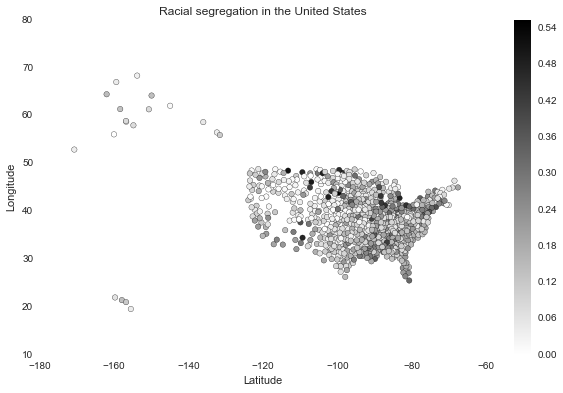

In [34]:
fig, ax = plt.subplots(figsize=(10,6)) ##initialize a figure
colors = plt.get_cmap(name='binary') ##load up a grayscale colormap
f = ax.scatter(df.Longitude, df.Latitude, c=df.Seg_racial, s=30, cmap=colors)
ax.set_title('Racial segregation in the United States')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.grid()
plt.colorbar(f)

<matplotlib.colorbar.Colorbar instance at 0x10b3ee518>

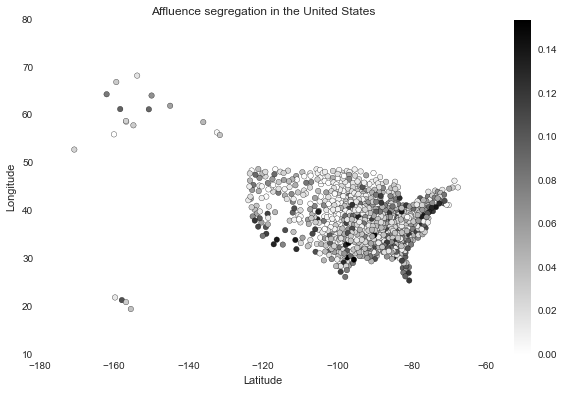

In [35]:
##We can also look at affluence segregation
fig, ax = plt.subplots(figsize=(10,6)) ##initialize a figure
colors = plt.get_cmap(name='binary') ##load up a grayscale colormap
f = ax.scatter(df.Longitude, df.Latitude, c=df.Seg_affluence, s=30, cmap=colors)
ax.set_title('Affluence segregation in the United States')
ax.grid()
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.colorbar(f) ##Show the colorbar

##Plotting
In our data frame, we have columns for affluence segregation *and* income segregation.  Income is based on yearly take-home pay, affluence is based on total wealth.  How well do these track each other?

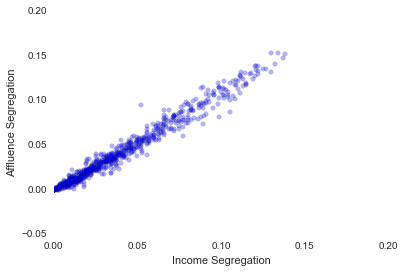

In [36]:
fig, ax = plt.subplots()
ax.scatter(df.Seg_income, df.Seg_affluence, alpha=0.3)
ax.set_xlim((0,0.2))
ax.set_xlabel('Income Segregation')
ax.set_ylabel('Affluence Segregation')
ax.grid()

The [interocular trauma test](http://www.johndcook.com/blog/2009/08/31/the-iot-test/) tells us what we need to know here; these variables are as close to the same thing as we will see in a dataset.  How well does racial segregation correlate with affluence segregation -- and, by transitivity, income segregation?

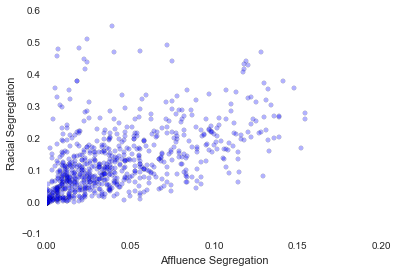

In [37]:
fig, ax = plt.subplots()
ax.scatter(df.Seg_affluence, df.Seg_racial, cmap=colors, alpha=0.3)
ax.set_xlim((0,0.2))
ax.grid()
ax.set_xlabel('Affluence Segregation')
ax.set_ylabel('Racial Segregation')

Not nearly as well.

#Statistics
Let's fit a [linear regression model](http://en.wikipedia.org/wiki/Linear_regression#Introduction_to_linear_regression) to discover relationships in our data.  We will use the [ordinary least squares](http://statsmodels.sourceforge.net/0.5.0/generated/statsmodels.regression.linear_model.OLS.html) object from the [statsmodels](http://statsmodels.sourceforge.net/0.5.0/index.html) library.  A common pattern in model-fitting objects in the Python scientific stack can be seen here.  The model is treated as an object itself and is initialized *without* being fit.  Then you use the .fit() method to fit the model, then your model is endowed with attributes like coefficients, residuals, likelihood, and all sorts of statistical information that will depend on the kind of model you have fit.

We are going to linearly regress the [Gini coefficient](http://en.wikipedia.org/wiki/Gini_coefficient)--used widely by social scientists as a measure of socioeconomic inequality--on socioeconomic mobility.

When we do linear regression with the statsmodels library, we need to add a column of ones onto our predictor variable if we want to have an intercept in our regression model.  The Wikpedia link on the linear regression page will make it clear why.  (Hint: think of the matrix formulation of linear regression problem.)

In [38]:
import statsmodels.api as sm
mob_gini = df[['Gini', 'Mobility']].dropna() #Drop NAs before fitting
GINI = sm.add_constant(mob_gini.Gini)
GINI.head()

,const,Gini
0,1,0.468
1,1,0.435
2,1,0.441
3,1,0.508
4,1,0.466


In [39]:
MOBILITY = mob_gini.Mobility
model = sm.OLS(MOBILITY, GINI)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:               Mobility   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     277.9
Date:                Sat, 11 Apr 2015   Prob (F-statistic):           4.40e-53
Time:                        14:30:56   Log-Likelihood:                 1230.3
No. Observations:                 729   AIC:                            -2457.
Df Residuals:                     727   BIC:                            -2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2408      0.009     28.054      0.0

Let's plot our model with the data now.

In [40]:
sim_x = np.arange(0,df.Gini.max(),0.005) ##This *about* fits the range of the data
beta_0, beta_1 = results.params
predicted_mobility = beta_1*sim_x +beta_0

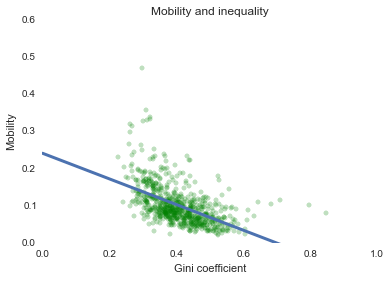

In [41]:
fig, ax = plt.subplots()
ax.scatter(df.Gini, df.Mobility, color='g', alpha=0.25)
ax.plot(sim_x, predicted_mobility, lw=3)
ax.grid()
ax.set_xlabel('Gini coefficient')
ax.set_ylabel('Mobility')
ax.set_xlim((0,1))
ax.set_ylim((0,0.6))
ax.set_title('Mobility and inequality')

##Using labeling to discover structure in data
Let's revist our segregation and affluence plot -- but this time let's label urban and rural commuting zones separately and run a linear regression.

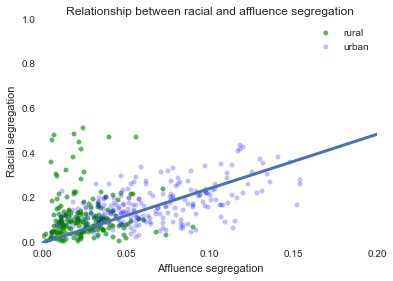

In [42]:
race_affluence = df[['Seg_racial', 'Seg_affluence']].dropna()
seg_model = sm.OLS(race_affluence.Seg_racial, race_affluence.Seg_affluence)
seg_params = seg_model.fit().params
sim_seg_aff = np.arange(0, 0.3, 0.005)
predicted_seg_racial = seg_params[0]*sim_seg_aff
fig, ax = plt.subplots()
ax.scatter(rural.Seg_affluence, rural.Seg_racial, color='g', alpha=0.6, label='rural')
ax.scatter(urban.Seg_affluence, urban.Seg_racial, color='b', alpha=0.25, label='urban')
ax.plot(sim_seg_aff, predicted_seg_racial, lw=3)
ax.set_xlim(0,0.2)
ax.set_ylim(0,1)
ax.grid()
ax.legend()
ax.set_xlabel('Affluence segregation')
ax.set_ylabel('Racial segregation')
ax.set_title('Relationship between racial and affluence segregation')

A few things to notice:

    1. There is a group of rural outliers that the model fails quite badly on.
    2. The model has a noticeable tendency to underestimate racial segregation in rural areas.
    3. We have more urban data points than rural ones, so our model is better trained to predict racial segregation in urban areas than rural ones.
    
The pronounced failure on rural outliers suggests that different socioeconomic dynamics may be at play in rural areas and that it may be sensible to treat them separately in our analysis.  More on this later.

#"Big Data"
This is all well and good, but we'd like to be able to investigate the relationships between *all* the variables.  Running single-variable linear regressions fails us here -- we'd be left with about $40^2$ possible regressions to run.  Some of these variables (like affluence segregation and income segregation) are really the same thing, and most of these relationships are not even *remotely* linear.

Fortunately, we can use just a few lines of code to get a large amount of insight from the data set.  We will use the [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) library to generate a beautiful clustered heatmap.

But first we need correlation coefficients between all of our variables. Most of our relationships are nonlinear (check it for yourself if you want -- regression things on population is a good place to start), but mostly, we're interested in whether one thing is a decreasing or increasing function of another.  Enter the [Spearman correlation coefficient](http://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient), which, loosely speaking, tells us how well we can model the relationship between two variables with a monotonic function.

Unless you're a numerologist, the ID in the study is meaningless, so we'll drop that.
Latitude and longitude are also uninteresting variables, so we may as well drop them, too.
Finally, since affluence segregation and income segregation are the same thing, we may as well drop one of those.  Urban is a binary variable and is less informative than population, so best to drop that, too.

In [43]:
corr_df = df.copy()
del corr_df['ID']
del corr_df['Urban']
del corr_df['Seg_income']
del corr_df['Latitude']
del corr_df['Longitude']
correlations = corr_df.corr('spearman')

Now we have a matrix of Spearman correlation coefficients.

In [44]:
correlations

,Mobility,Population,Black,Seg_racial,Seg_poverty,Seg_affluence,Commute,Income,Gini,Share01,...,Teenage_labor,Migration_in,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married
Mobility,1.000000,-0.486288,-0.685564,-0.457093,-0.425953,-0.389216,0.625985,0.065437,-0.603159,-0.319660,...,0.558479,-0.231753,-0.099830,-0.048403,0.544231,0.358418,-0.402244,-0.759201,-0.365999,0.529588
Population,-0.486288,1.000000,0.580261,0.615772,0.818349,0.814039,-0.811987,0.369302,0.505455,0.557757,...,-0.343794,0.485757,0.302127,0.393290,-0.375885,-0.290818,0.290810,0.431839,0.264566,-0.451022
Black,-0.685564,0.580261,1.000000,0.510471,0.524249,0.503302,-0.661187,-0.019722,0.613921,0.393658,...,-0.643427,0.238034,0.178737,0.191951,-0.584804,-0.183039,0.487922,0.691779,0.171703,-0.491434
Seg_racial,-0.457093,0.615772,0.510471,1.000000,0.620790,0.580733,-0.523715,0.097503,0.391641,0.306288,...,-0.285472,0.164049,0.133928,0.209725,-0.311871,-0.090891,0.295025,0.506975,0.103746,-0.460855
Seg_poverty,-0.425953,0.818349,0.524249,0.620790,1.000000,0.940432,-0.613609,0.313564,0.470882,0.492385,...,-0.255375,0.502458,0.423199,0.416140,-0.335042,-0.272290,0.309265,0.473787,0.227358,-0.586298
Seg_affluence,-0.389216,0.814039,0.503302,0.580733,0.940432,1.000000,-0.595459,0.346995,0.485829,0.514869,...,-0.228445,0.524008,0.476739,0.473354,-0.337074,-0.259823,0.335637,0.420554,0.235430,-0.523366
Commute,0.625985,-0.811987,-0.661187,-0.523715,-0.613609,-0.595459,1.000000,-0.220829,-0.617755,-0.525014,...,0.577510,-0.409754,-0.188899,-0.196614,0.561995,0.351825,-0.342879,-0.499662,-0.318727,0.390427
Income,0.065437,0.369302,-0.019722,0.097503,0.313564,0.346995,-0.220829,1.000000,-0.064460,0.297861,...,0.418724,0.269686,0.164200,0.317847,0.353419,-0.077467,-0.055400,-0.141266,0.105362,-0.001348
Gini,-0.603159,0.505455,0.613921,0.391641,0.470882,0.485829,-0.617755,-0.064460,1.000000,0.725722,...,-0.618393,0.278793,0.209659,0.267314,-0.659585,-0.271076,0.450707,0.638136,0.261433,-0.443253
Share01,-0.319660,0.557757,0.393658,0.306288,0.492385,0.514869,-0.525014,0.297861,0.725722,1.000000,...,-0.227907,0.299418,0.202047,0.292429,-0.274202,-0.167703,0.204212,0.274250,0.138077,-0.293811


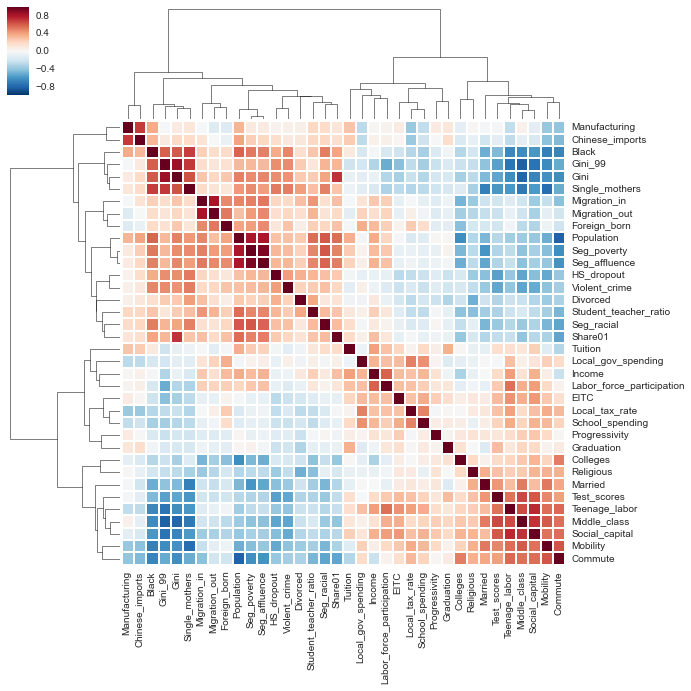

In [45]:
sns.clustermap(correlations)

We could interpret this correlation heatmap to construct a more informative (and multivariate!) linear model to predict mobility.  Doing so is left as an exercise.  (Hint: OLS can take an array instead of just a vector -- then you'll get coefficients for all of the variables in the array that you pass to it.

##A bit more Seaborn
Seaborn also perform quick and dirty regressions with very pretty plots.

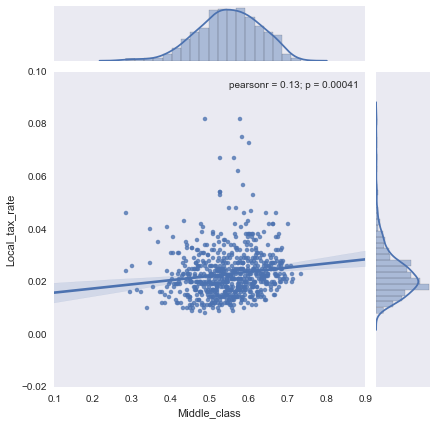

In [46]:
sns.set_style('dark')
sns.jointplot(df.Middle_class, df.Local_tax_rate, kind='reg')

...or we can get a joint [kernel density estimate](http://en.wikipedia.org/wiki/Kernel_density_estimation), which can be used for inference, simulation, and prediction, or as a way to present [something like a histogram](http://www.mglerner.com/blog/?p=28) without having to worry about choice of bin size.

KDEs can also helpful in nonparametrically estimating entropy ([if you're into that kind of thing](http://jimbeck.caltech.edu/summerlectures/references/Entropy%20estimation.pdf)).

However, if you want to use it for anything other than visualization, then, as far as I know, you'll have to use a KDE object from some other library.  The [KDE from statsmodels](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) is easy to use and works exactly like the OLS object we used earlier.

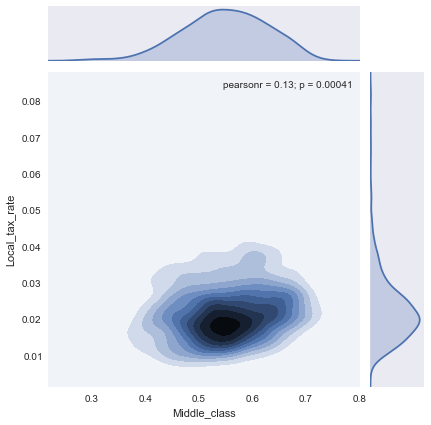

In [47]:
sns.jointplot(df.Middle_class, df.Local_tax_rate, kind='kde')

Isn't that prettier than a histogram?  Notice that the *kind* parameter in the jointplot function controls the details of the figure.  Jump in and mess around with it yourself!

##Comparing rural and urban communities
Let's see how different the correlates of mobility are in rural and urban communities.

In [ ]:
##Getting rid of uninteresting variables before we correlate
del rural['ID']
del rural['Urban']
del rural['Seg_income']
del rural['Latitude']
del rural['Longitude']
del urban['ID']
del urban['Urban']
del urban['Seg_income']
del urban['Latitude']
del urban['Longitude']

In [60]:
urban_correlations = urban.corr('spearman')
rural_correlations = rural.corr('spearman')

###Correlates of mobility in rural areas

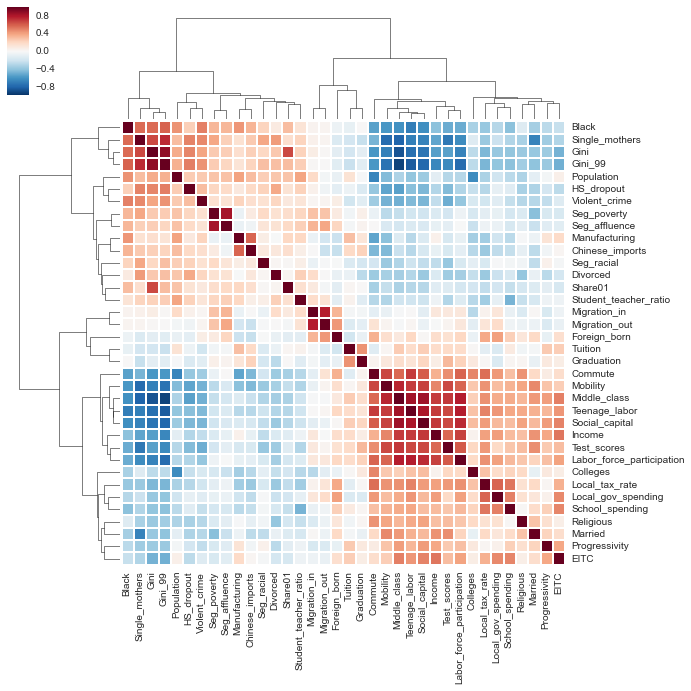

In [61]:
sns.clustermap(rural_correlations)

###Correlates of mobility in urban areas

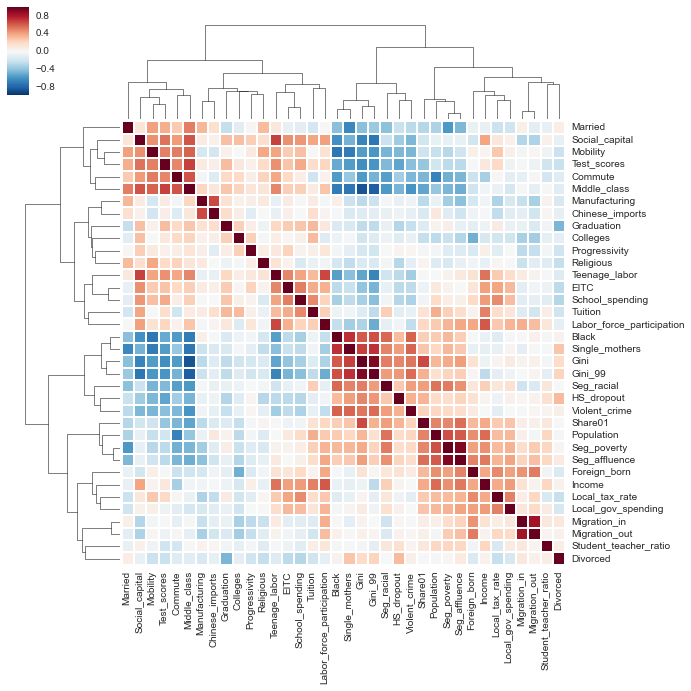

In [62]:
sns.clustermap(urban_correlations)

In [86]:
rural_correlations.Mobility.sort(inplace=False, ascending=False)[1:16]

Middle_class                 0.762826
Teenage_labor                0.702694
Social_capital               0.680170
Commute                      0.664934
Test_scores                  0.662494
Labor_force_participation    0.585005
Income                       0.488355
Married                      0.479180
Local_tax_rate               0.451694
Religious                    0.398083
School_spending              0.349006
Local_gov_spending           0.309838
Progressivity                0.288877
Colleges                     0.270156
EITC                         0.246179
Name: Mobility, dtype: float64

In [87]:
urban_correlations.Mobility.sort(inplace=False, ascending=False)[1:16]

Middle_class                 0.592851
Commute                      0.518224
Test_scores                  0.506942
Social_capital               0.459890
Married                      0.413463
Teenage_labor                0.399384
Religious                    0.385677
School_spending              0.298815
Local_tax_rate               0.270560
EITC                         0.251585
Labor_force_participation    0.140839
Progressivity                0.096529
Foreign_born                 0.058671
Local_gov_spending           0.055212
Graduation                   0.051839
Name: Mobility, dtype: float64